**X-Ray classification**

**Deep augmentation**

**70 epochs**

**all**

* **resnet**

# Libraries

In [1]:
import tensorflow as tf
import lib.data_loader as data_loader
import lib.plot_learning_curves as plot_learning_curves
import models.base_model as base_model
import models.resnet as resnet
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import matplotlib.image as mpimg
# from tqdm import tqdm
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import random, os
import numpy as np
import pandas as pd
import json
# import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from glob import glob
import gc
# from skimage.transform import resize
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

from sklearn.metrics import f1_score, recall_score, precision_score

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
! pip install -q -U keras-tuner
import keras_tuner as kt

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.0
Train model
Tensorflow version 2.4.0
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Tensorflow version 2.4.0


# Data  munging

In [2]:
# mount data
data_path = 'data/MURA-v1.1/'
directory = 'data/'
! pwd
train, test, bodyparts, bodyparts_train_validation_dict, train_generators, valid_generators, test_generators = data_loader.data_loader(data_augmentation='deep_augment')

/tf

Import train and test data


Create dictionary for training and validation set per body part

Doing a light data augmentation

Create dictionary for training, validation and test set per body part

Found 7546 validated image filenames.
Found 833 validated image filenames.
Found 563 validated image filenames.
Found 4596 validated image filenames.
Found 510 validated image filenames.
Found 461 validated image filenames.
Found 1147 validated image filenames.
Found 125 validated image filenames.
Found 288 validated image filenames.
Found 1649 validated image filenames.
Found 176 validated image filenames.
Found 301 validated image filenames.
Found 4422 validated image filenames.
Found 509 validated image filenames.
Found 465 validated image filenames.
Found 8793 validated image filenames.
Found 959 validated image filenames.
Found 659 validated image filenames.
Found 4963 validated image filenames.
Found 580 validated image filenames.
Found 460 validated image filenames.
Data munging 

# ResNet

In [3]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

In [10]:
res_done = ['XR_SHOULDER', 'XR_HAND', 'XR_FINGER', 'XR_FOREARM', 'XR_HUMERUS']

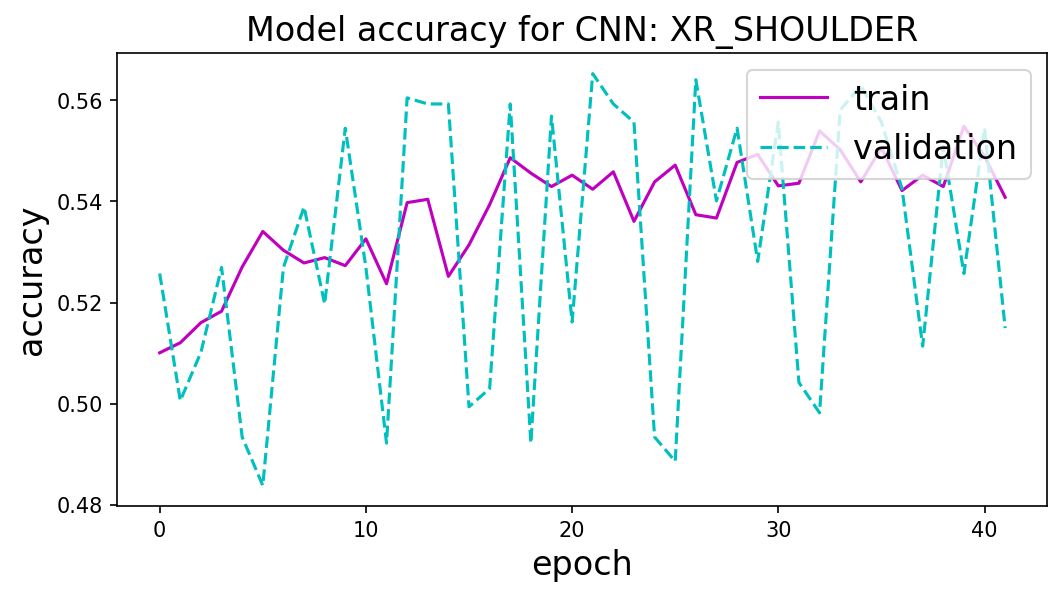

<Figure size 432x288 with 0 Axes>

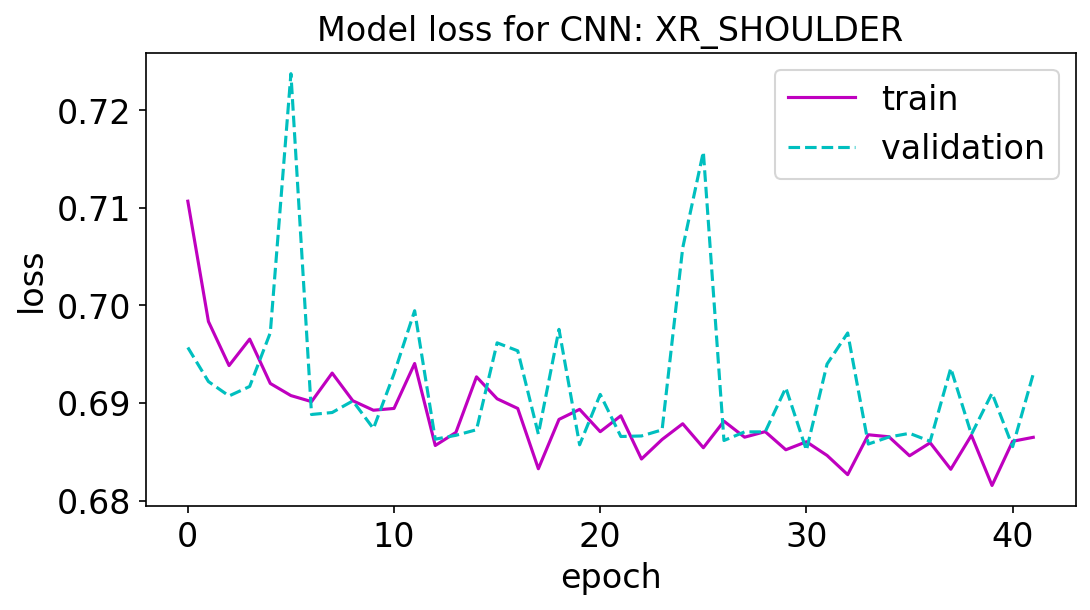

<Figure size 432x288 with 0 Axes>

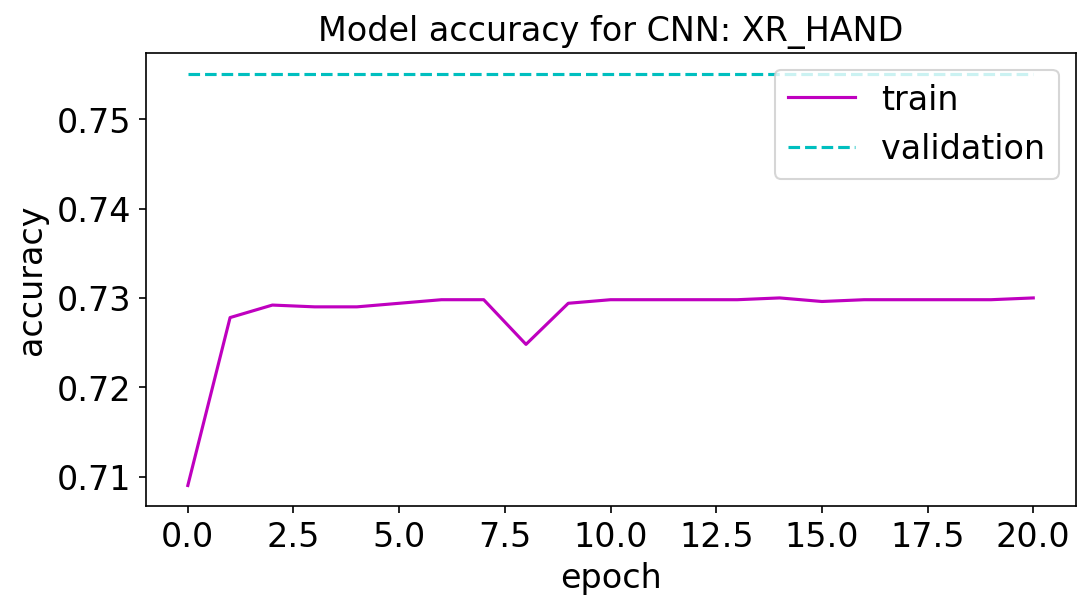

<Figure size 432x288 with 0 Axes>

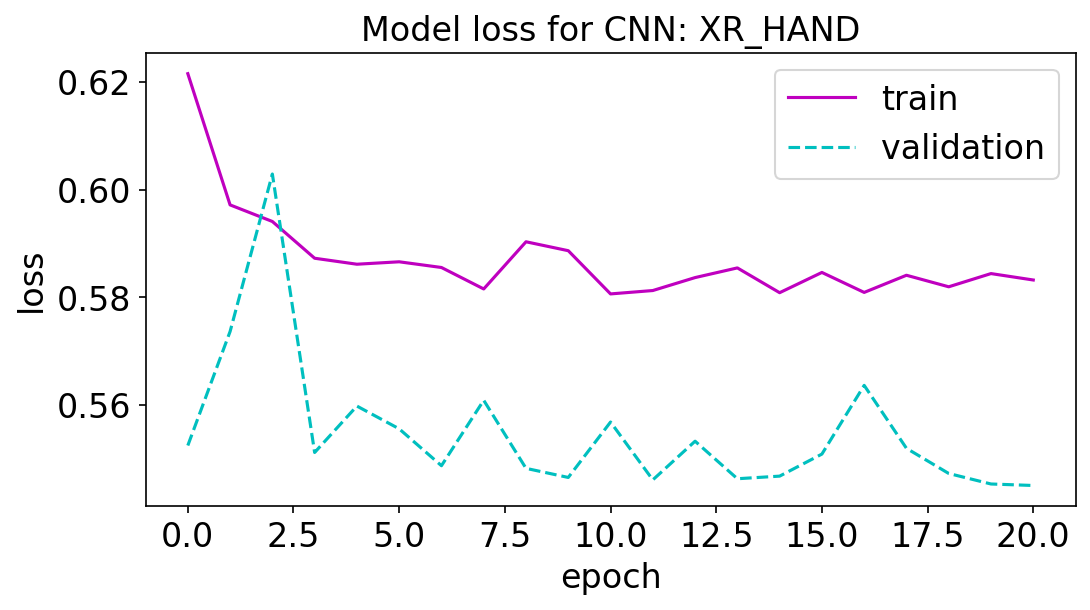

<Figure size 432x288 with 0 Axes>

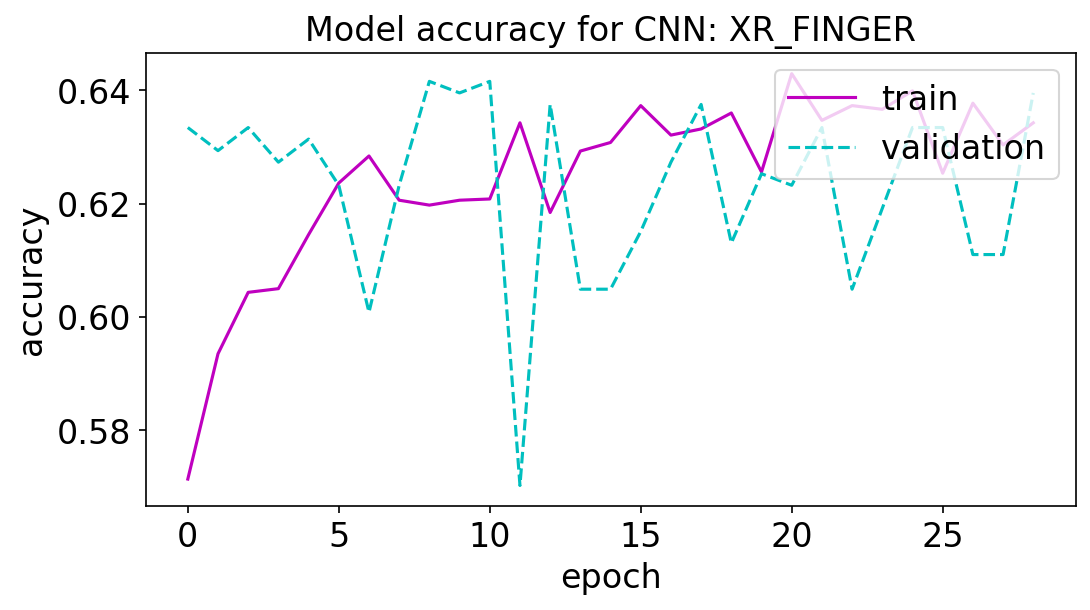

<Figure size 432x288 with 0 Axes>

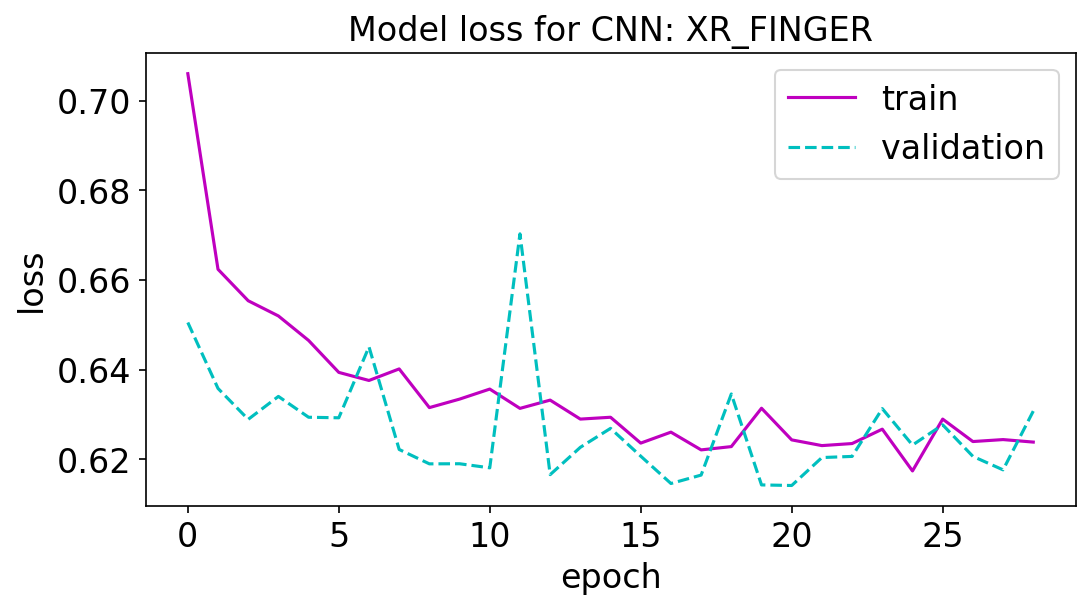

<Figure size 432x288 with 0 Axes>

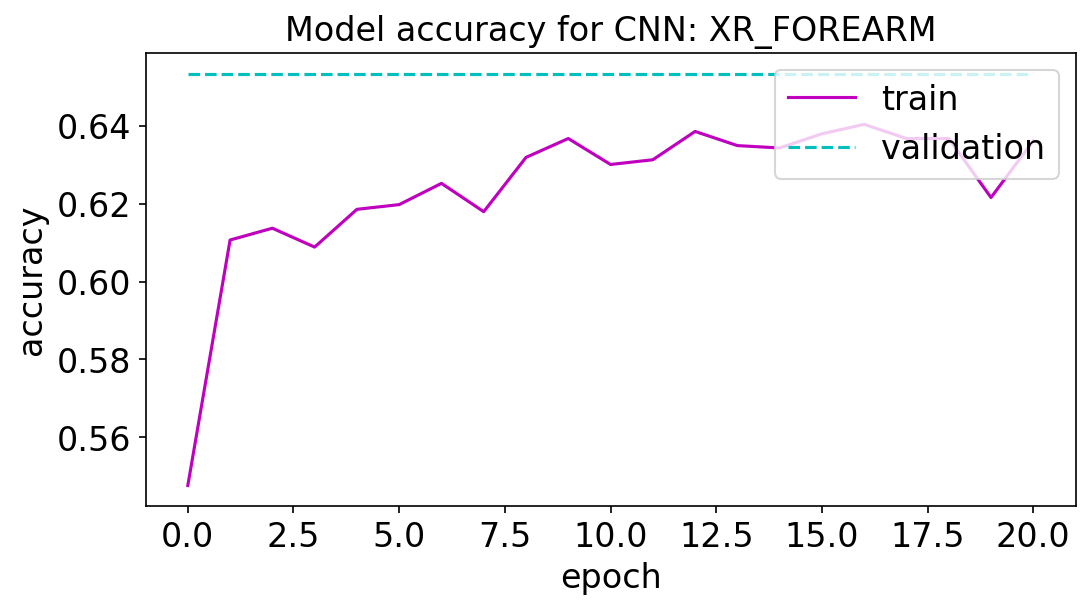

<Figure size 432x288 with 0 Axes>

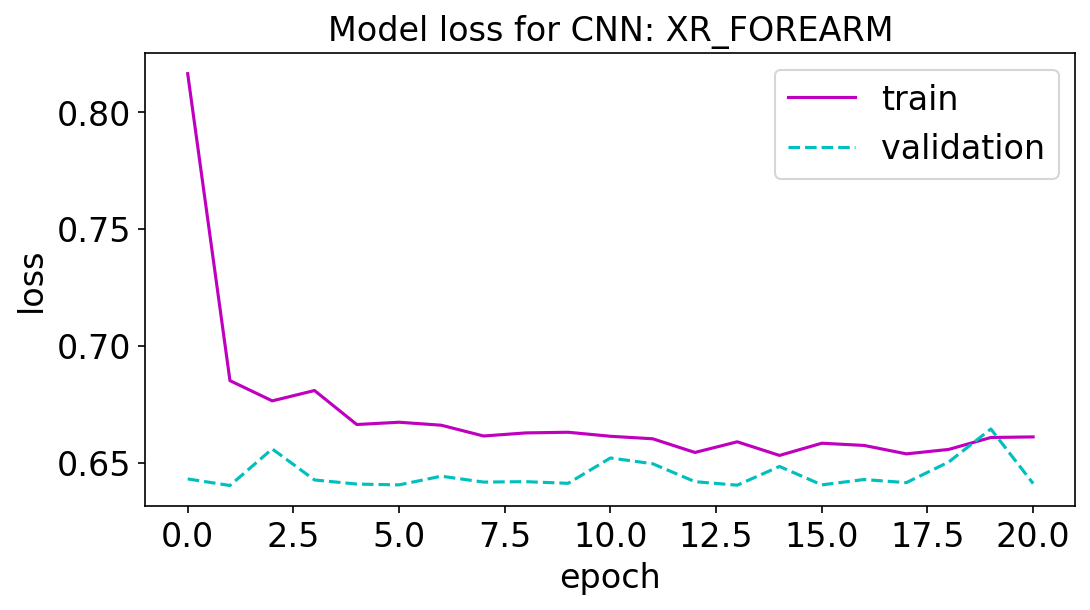

<Figure size 432x288 with 0 Axes>

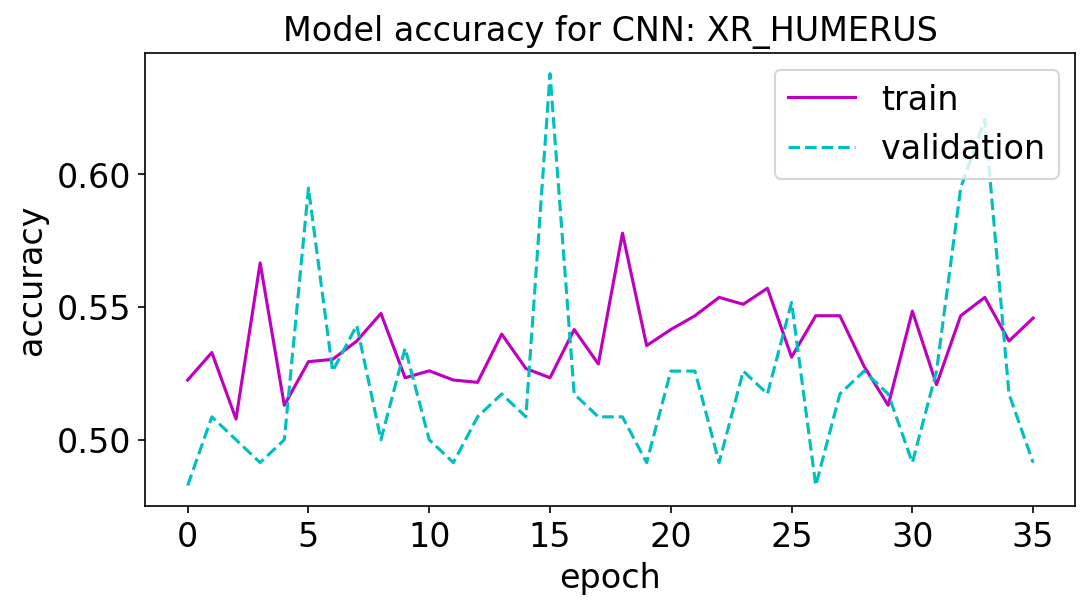

<Figure size 432x288 with 0 Axes>

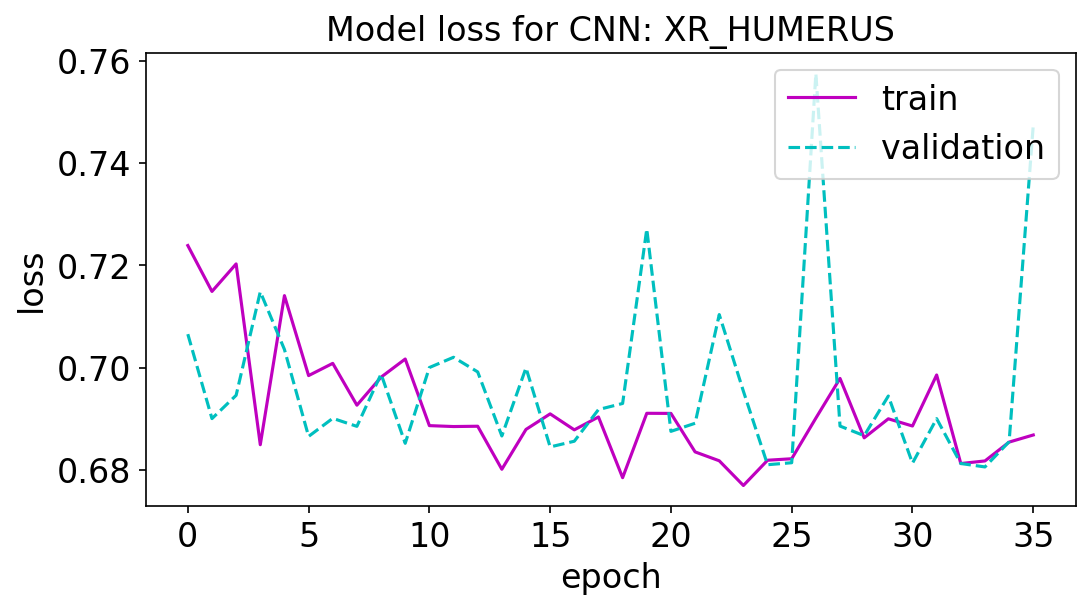

<Figure size 432x288 with 0 Axes>

In [11]:
import json
resnet_model_top_histories_reloaded = {}
for bodypart in res_done:
    url = "data/history/history_resnet_model_top_model_70epochs_deep_augment_"+bodypart+".json"
    f = open(url)
    resnet_model_top_histories_reloaded[bodypart] = json.load(f)

for bodypart in res_done:
    plot_learning_curves.plot_history_from_dict(resnet_model_top_histories_reloaded[bodypart], 
                                     bodypart,
                                     'resnet_model_top',
                                     70,
                                     data_augmentation='deep_augment')

In [13]:
res_done

['XR_SHOULDER', 'XR_HAND', 'XR_FINGER', 'XR_FOREARM', 'XR_HUMERUS']

In [ ]:
resnet_model_top_histories = {}
for bodypart in bodyparts:
    print(bodypart)
    print("\nBuild model\n")
    model = resnet.build_model_on_resnet()
    print('\nTrain model\n')
    print(bodypart)
    resnet_model_top_histories[bodypart] = resnet.train_model(model, 
                                                             bodypart,
                                                             valid_generators,
                                                             train_generators,
                                                             70)
    print('\nSave training history\n')
    with open("data/history/history_resnet_model_top_model_70epochs_deep_augment_"+bodypart+".json", "w") as file:
        json.dump(resnet_model_top_histories[bodypart].history, file)
        print('\nSave model\n')
    model.save("data/models/resnet_model_top_70epochs_deep_augment_"+bodypart)
    model.save("data/models/resnet_model_top_70epochs_deep_augment_"+bodypart+".h5")
    print('\nEvaluate model\n')
    model.evaluate(test_generators[bodypart], verbose=1)
    model.evaluate(train_generators[bodypart], verbose=1)
    model.evaluate(valid_generators[bodypart], verbose=1)
    print("Delete model")
    clean_up(model)

XR_SHOULDER

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 58,372,993
Trainable params: 2,049
Non-trainable params: 58,370,944
_________________________________________________________________

Train model

XR_SHOULDER
Using validation_steps = 27
Using steps_per_epoch = 236


/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/70
236/236 [==============================] - 1634s 7s/step - loss: 0.7141 - binary_accuracy: 0.5190 - val_loss: 0.6957 - val_binary_accuracy: 0.5257
Epoch 2/70
236/236 [==============================] - 1534s 6s/step - loss: 0.7004 - binary_accuracy: 0.5147 - val_loss: 0.6922 - val_binary_accuracy: 0.5006
Epoch 3/70
236/236 [==============================] - 1633s 7s/step - loss: 0.6959 - binary_accuracy: 0.5162 - val_loss: 0.6907 - val_binary_accuracy: 0.5102
Epoch 4/70
236/236 [==============================] - 1680s 7s/step - loss: 0.6975 - binary_accuracy: 0.5120 - val_loss: 0.6917 - val_binary_accuracy: 0.5269
Epoch 5/70
236/236 [==============================] - 1631s 7s/step - loss: 0.6928 - binary_accuracy: 0.5284 - val_loss: 0.6972 - val_binary_accuracy: 0.4934
Epoch 6/70
236/236 [==============================] - 1437s 6s/step - loss: 0.6936 - binary_accuracy: 0.5305 - val_loss: 0.7237 - val_binary_accuracy: 0.4838
Epoch 7/70
236/236 [==============================] 

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


27/27 [==============================] - 96s 4s/step - loss: 0.6930 - binary_accuracy: 0.5150
Delete model
XR_HAND

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 58,372,993
Trainable params: 2,049
Non-trainable params: 58,370,944
________________________________________________

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


17/17 [==============================] - 57s 3s/step - loss: 0.5450 - binary_accuracy: 0.7551
Delete model
XR_FINGER

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 58,372,993
Trainable params: 2,049
Non-trainable params: 58,370,944
______________________________________________

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 54s 3s/step - loss: 0.6308 - binary_accuracy: 0.6395
Delete model
XR_FOREARM

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 58,372,993
Trainable params: 2,049
Non-trainable params: 58,370,944
_____________________________________________

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


6/6 [==============================] - 20s 3s/step - loss: 0.6410 - binary_accuracy: 0.6534
Delete model
XR_HUMERUS

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 58,372,993
Trainable params: 2,049
Non-trainable params: 58,370,944
_______________________________________________

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


4/4 [==============================] - 17s 4s/step - loss: 0.7474 - binary_accuracy: 0.4914
Delete model
XR_ELBOW

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 58,372,993
Trainable params: 2,049
Non-trainable params: 58,370,944
_________________________________________________

In [4]:
bodyparts_left = ['XR_ELBOW', 'XR_WRIST']

In [5]:
resnet_model_top_histories = {}
for bodypart in bodyparts_left:
    print(bodypart)
    print("\nBuild model\n")
    model = resnet.build_model_on_resnet()
    print('\nTrain model\n')
    print(bodypart)
    resnet_model_top_histories[bodypart] = resnet.train_model(model, 
                                                             bodypart,
                                                             valid_generators,
                                                             train_generators,
                                                             70)
    print('\nSave training history\n')
    with open("data/history/history_resnet_model_top_model_70epochs_deep_augment_"+bodypart+".json", "w") as file:
        json.dump(resnet_model_top_histories[bodypart].history, file)
        print('\nSave model\n')
    model.save("data/models/resnet_model_top_70epochs_deep_augment_"+bodypart)
    model.save("data/models/resnet_model_top_70epochs_deep_augment_"+bodypart+".h5")
    print('\nEvaluate model\n')
    model.evaluate(test_generators[bodypart], verbose=1)
    model.evaluate(train_generators[bodypart], verbose=1)
    model.evaluate(valid_generators[bodypart], verbose=1)
    print("Delete model")
    clean_up(model)

XR_ELBOW

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 58,372,993
Trainable params: 2,049
Non-trainable params: 58,370,944
_________________________________________________________________

Train model

XR_ELBOW
Using validation_steps = 16
Using steps_per_epoch = 139


/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/70
139/139 [==============================] - 534s 4s/step - loss: 0.7242 - binary_accuracy: 0.5284 - val_loss: 0.6736 - val_binary_accuracy: 0.5972
Epoch 2/70
139/139 [==============================] - 500s 4s/step - loss: 0.6941 - binary_accuracy: 0.5658 - val_loss: 0.6726 - val_binary_accuracy: 0.5992
Epoch 3/70
139/139 [==============================] - 496s 4s/step - loss: 0.6744 - binary_accuracy: 0.5943 - val_loss: 0.6734 - val_binary_accuracy: 0.5992
Epoch 4/70
139/139 [==============================] - 521s 4s/step - loss: 0.6755 - binary_accuracy: 0.5856 - val_loss: 0.6720 - val_binary_accuracy: 0.5992
Epoch 5/70
139/139 [==============================] - 453s 3s/step - loss: 0.6780 - binary_accuracy: 0.5824 - val_loss: 0.6713 - val_binary_accuracy: 0.5992
Epoch 6/70
139/139 [==============================] - 490s 4s/step - loss: 0.6833 - binary_accuracy: 0.5712 - val_loss: 0.6804 - val_binary_accuracy: 0.5992
Epoch 7/70
139/139 [==============================] - 491s

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 50s 3s/step - loss: 0.6709 - binary_accuracy: 0.5992
Delete model
XR_WRIST

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 10, 10, 2048)      58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 58,372,993
Trainable params: 2,049
Non-trainable params: 58,370,944
_______________________________________________

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


30/30 [==============================] - 245s 8s/step - loss: 0.6340 - binary_accuracy: 0.6590
Delete model


In [8]:
resnet_model_top_histories.keys()

dict_keys(['XR_ELBOW', 'XR_WRIST'])

XR_ELBOW


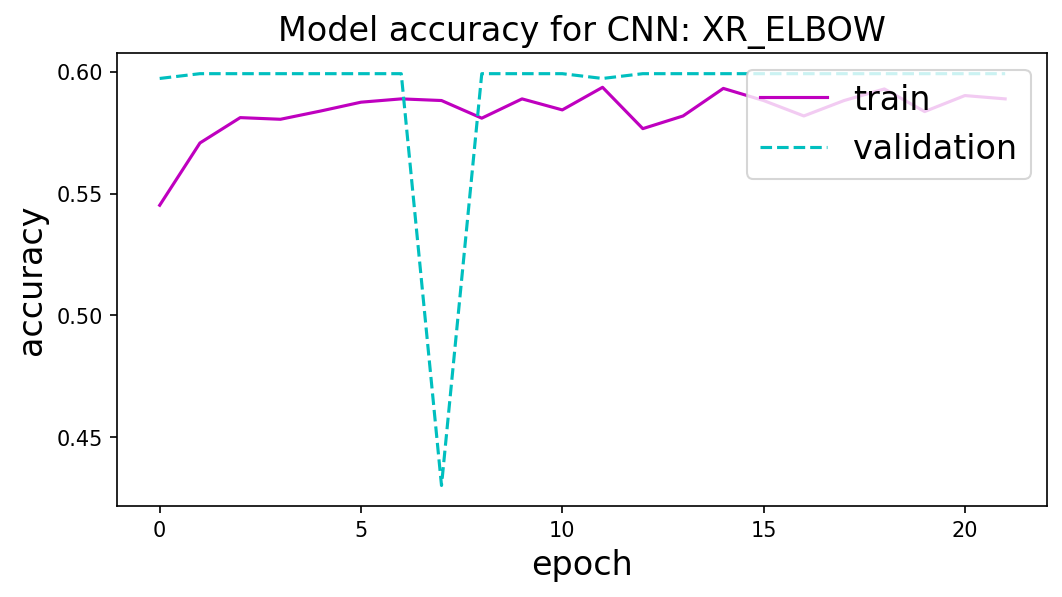

<Figure size 432x288 with 0 Axes>

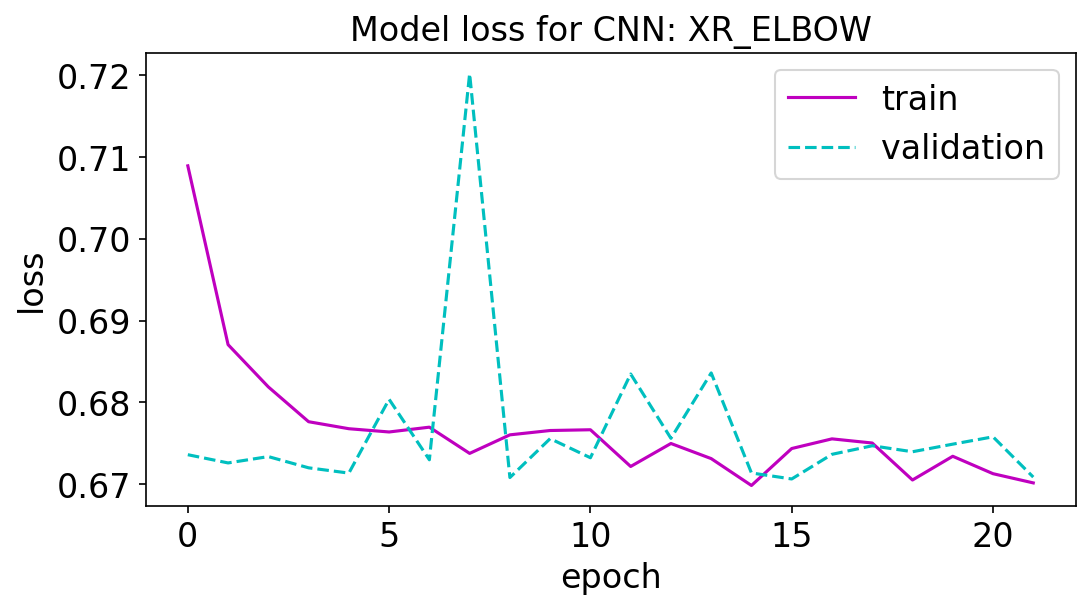

XR_WRIST


<Figure size 432x288 with 0 Axes>

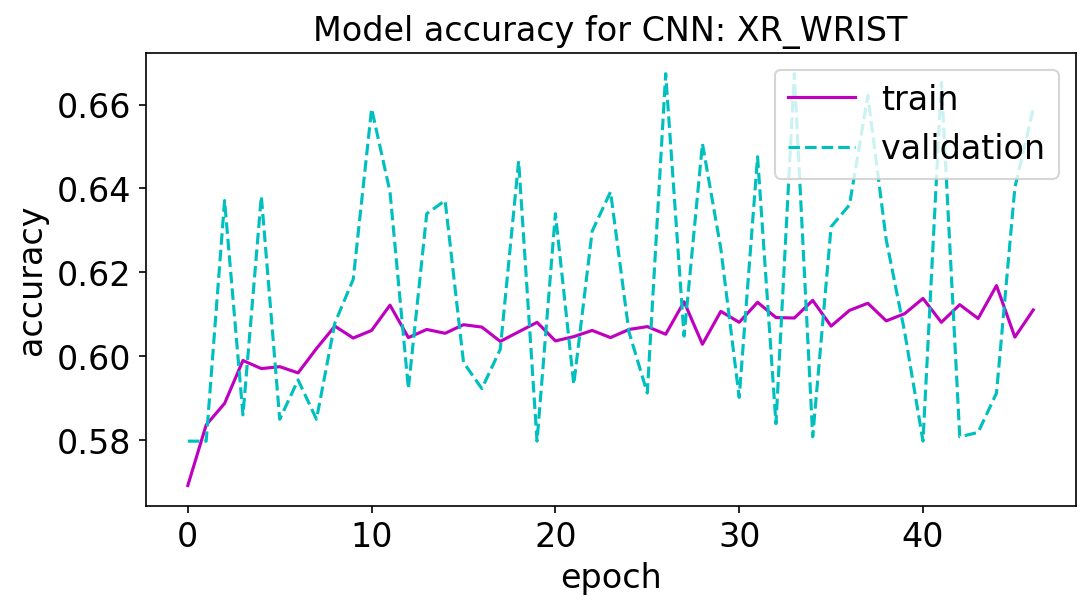

<Figure size 432x288 with 0 Axes>

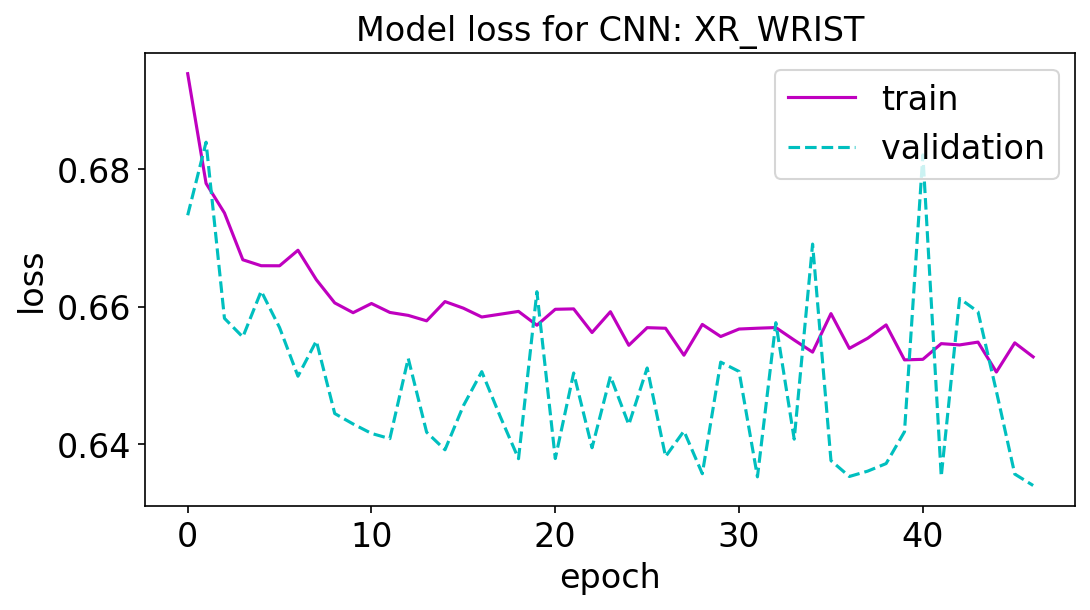

<Figure size 432x288 with 0 Axes>

In [11]:
for bodypart in bodyparts_left:
    print(bodypart)
    plot_learning_curves.plot_history(resnet_model_top_histories[bodypart], 
                                      bodypart,
                                     'resnet_model_top',
                                     70,
                                     data_augmentation='deep_augment')

In [ ]:
# for bodypart in bodyparts:
#     print(bodypart)
#     model = tf.keras.models.load_model("data/models/resnet_model_top_70epochs_deep_augment_"+bodypart+".h5")
#     model.evaluate(train_generators[bodypart], verbose=1)
#     model.evaluate(valid_generators[bodypart], verbose=1)
#     print("Delete model")
#     clean_up(model)